In [1]:
import sys
sys.path.append('../../')
import numpy as np
from IPython.display import HTML

from rover_simulator.world import World
from rover_simulator.rover import BasicRover
from rover_simulator.history import SimpleHistory
from rover_simulator.navigation.controller import ConstantSpeedController
from rover_simulator.navigation.path_planner.sampling_base import ChanceConstrainedRRT

In [3]:
world = World()
world.read_objects("../../rover_simulator/examples/environment_simple.txt")

rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13.0, 15.0])

path_planner = ChanceConstrainedRRT(
    start_pose[0:2],
    goal_pos,
    start_cov=np.diag([1e-10, 1e-10, 1e-10]),
    motion_noise_stds = {"nn": 0.05, "no": 0.00005, "on": 0.005, "oo": 0.01},
    enlarge_range=rover_r,
    explore_region=[[0, 20], [0, 20]],
    known_obstacles=world.obstacles,
    p_safe=1.0-1e-5
)

rover = BasicRover(
    start_pose, rover_r,
    sensor=None,
    mapper=None,
    path_planner=path_planner,
    localizer=None,
    controller=ConstantSpeedController(w=np.pi/32),
    history=SimpleHistory()
)

world.append_rover(rover)

In [4]:
rover.waypoints = rover.path_planner.calculate_path(max_iter=200)

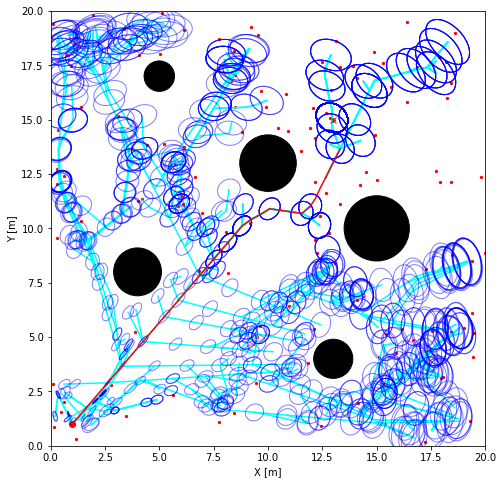

In [5]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r
)

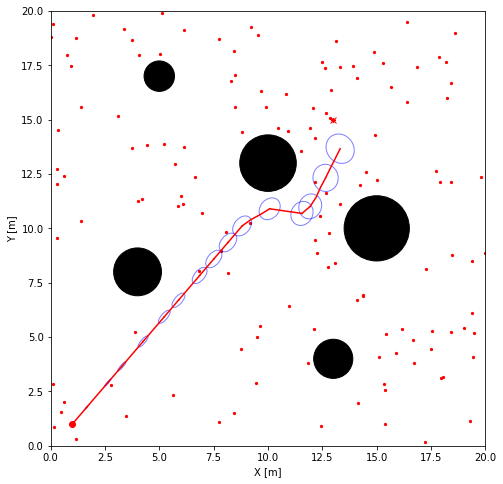

In [6]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r,
    draw_result_only=True
)

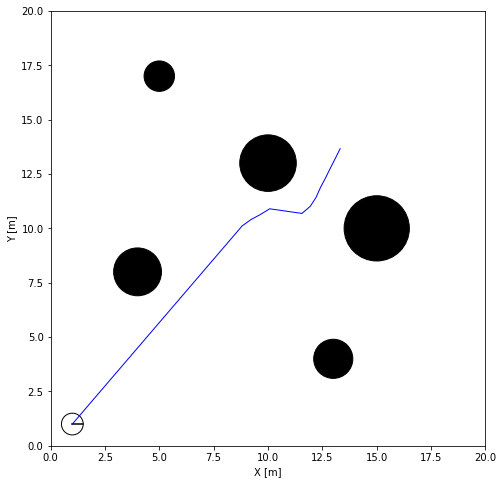

In [9]:
world.draw(
    [0, 20], [0, 20],
    enlarge_range=rover.r,
    draw_waypoints_flag=True
)